# Metal Bands by Nation  \m/

# A. Introduction

"Music is like a mirror, and it tells people a lot about who you are and what you care about, whether you like it or not. We love to say "you are what you stream," - Spotify

Metal music was developed in the late 1960s largely in the United Kingdom. It introduced a new form of the empathic beat with massive sounds, extended guitar solos, and extreme loudness. Not many people enjoy metal music due to the fear of its complexity. Nevertheless, research shows that metal music makes you calmer and helps heal aggression and stress. 

INSPIRATION: 

Music is something I consume every day. Metal music used to be one of my favorite genres a decade ago. I am fascinated by exploring the unique features of the different metal bands in the universe. Listening to Heavy Metal helped me stay calm and purge negative emotions. 

GOALS:

Given the data, I will use my knowledge to run an experiment to see if there is an increase in the number of fans for metal bands based on its country. I intend to use statistical inference testing in deriving sufficient results for the experiment. 

# B. Problem Statement:

The fanbase for metal music has been increasing rapidly for over a decade but;
- Is there any indication of the increase in fans for metal music according to its country of origin?
- What is the relationship between the bands and fans based on their country of origin?
- Are more bands being originated in the United States or Sweden?

I decided to run a statistical inference test to derive an accurate result, even though I believe that the United States has a large number of the fanbase for metal music.

I am fortunate to stumble upon the dataset on Kaggle: "Metal Bands by Nation" (https://www.kaggle.com/mrpantherson/metal-by-nation). I intend to use the data from this dataset to further analyze a solution to the problem.

Let's try to solve this problem through an experiment using the data science toolkit. 

In [1]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import seaborn as sns
%matplotlib inline

In [2]:
import os 
path = "/home/kaneeshadawood/Datasets/metal_bands_2017.csv"

In [3]:
# Loading data from the csv file. 
bands = pd.read_csv("/home/kaneeshadawood/Datasets/metal_bands_2017.csv", encoding='latin', index_col=0)
bands.head()   

,band_name,fans,formed,origin,split,style
0,Iron Maiden,4195,1975,United Kingdom,-,"New wave of british heavy,Heavy"
1,Opeth,4147,1990,Sweden,1990,"Extreme progressive,Progressive rock,Progressive"
2,Metallica,3712,1981,USA,-,"Heavy,Bay area thrash"
3,Megadeth,3105,1983,USA,1983,"Thrash,Heavy,Hard rock"
4,Amon Amarth,3054,1988,Sweden,-,Melodic death


# The Dataset

The data above provide us information about the metal bands of the countries on earth from the years 1960 to 2016. The information was originally scraped from the website http://metalstorm.net/. The data consists the following features:

- band_name : the unique name given to the band
- fans: the number of people devoted to the band
- formed: when was the band formed
- origin: the band's country of origin
- split: when did the band split
- style: the sub-genre style within metal music 

Now let's glean an insight into the contents of the dataframe:

In [4]:
bands.info() # basic information about the dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 6 columns):
band_name    5000 non-null object
fans         5000 non-null int64
formed       5000 non-null object
origin       4992 non-null object
split        5000 non-null object
style        5000 non-null object
dtypes: int64(1), object(5)
memory usage: 273.4+ KB


As shown above there appears to be 8 missing values in the 'origin' feature. Let's confirm this with the following code.

In [5]:
bands.isnull().sum() # Looking for null values

band_name    0
fans         0
formed       0
origin       8
split        0
style        0
dtype: int64

Let's now check if there are any duplicates in this dataset.

In [6]:
bands.band_name.duplicated().sum()

51

As you could see above, certain entries have been duplicated in this dataset which means we may have additional rows with similar criteria.

I am also curious in finding out the data types of each feature.

In [7]:
bands.dtypes

band_name    object
fans          int64
formed       object
origin       object
split        object
style        object
dtype: object

In [8]:
bands.shape # the dimensions of the dataset

(5000, 6)

# Data Cleaning

I will be performing the following steps in cleaning the dataset:
    
- Remove duplicate rows
- Remove missing values
- Cast object dtype to int/category
- Remove unwated characteristics from columns (such as '-')

In [9]:
# Dropping duplicate values
bands.drop_duplicates(subset=None, inplace=True)

In [10]:
# Dropping missing values
bands.dropna(inplace=True)  

In [24]:
# removing unwanted characters from columns
bands['formed'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')
bands['split'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')

In [25]:
bands.origin.dtype, "\n", bands.fans.dtype

(dtype('O'), '\n', dtype('int64'))

In [26]:
bands["origin"] = bands["origin"].astype("category")    #origin converted to category from object
bands["fans"] = bands["fans"].astype("int32")  #fans converted to int32 

print(bands.origin.dtype, "\n", bands.fans.dtype)

category 
 int32


In [27]:
bands["style"] = bands["style"].astype("category")    #origin converted to category from object

In [28]:
bands.dtypes

band_name      object
fans            int32
formed         object
origin       category
split          object
style        category
dtype: object

# Data Exploration

Let's explore the dataset further by asking more questions:

In [11]:
# How many countries are listed in this dataset?

origin = len(bands['origin'].unique()) 
origin

113

In [12]:
# How many metal bands are included in the dataset?

len(bands['band_name'].unique()) 

4941

In [13]:
# How many unique styles?

len(bands['style'].unique()) 

1226

In [14]:
# Total number of metal addicts?

bands['fans'].describe()

count    4942.000000
mean       70.381222
std       229.014587
min         0.000000
25%         4.000000
50%        11.000000
75%        41.000000
max      4195.000000
Name: fans, dtype: float64

In [15]:
# How many instances/ rows in terms of fan base? aka how big is my sample size

bands.shape

(4942, 6)

In [16]:
bands.origin.value_counts() # The number of bands 

USA                       1123
Sweden                     469
Germany                    393
United Kingdom             339
Finland                    300
                          ... 
Swaziland                    1
Bolivia                      1
United Kingdom, Greece       1
Greece, USA                  1
Lithuania, Germany           1
Name: origin, Length: 113, dtype: int64

In [17]:
bands['formed'].value_counts().sum()

4942

In [18]:
bands['split'].value_counts().sum()

4942

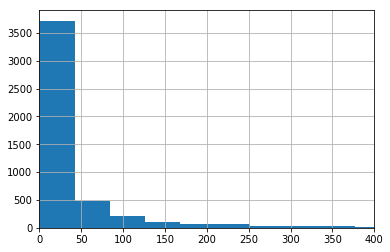

In [19]:
bands['fans'].hist(bins=100)
plt.xlim(0, 400)

plt.show() 

Mean number of fans: 70.38122217725618 
Standard deviation: 229.01458685240888 


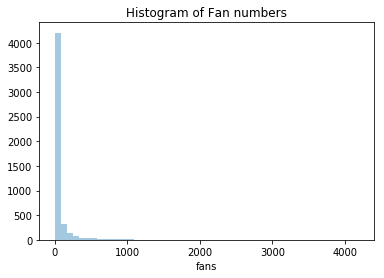

In [20]:
fans = bands['fans'].astype(str).astype(int)
sns.distplot(fans,kde=False).set_title('Histogram of Fan numbers')
print('Mean number of fans: %s '% fans.mean())
print('Standard deviation: %s '% fans.std())

From a count of 5000, more than 4000 fans are actively listening to metal music. The histogram is skewed to the right because the mean is larger than the the median (70.38 > 11). This means more metal bands have more than 50 fans interested in their music.

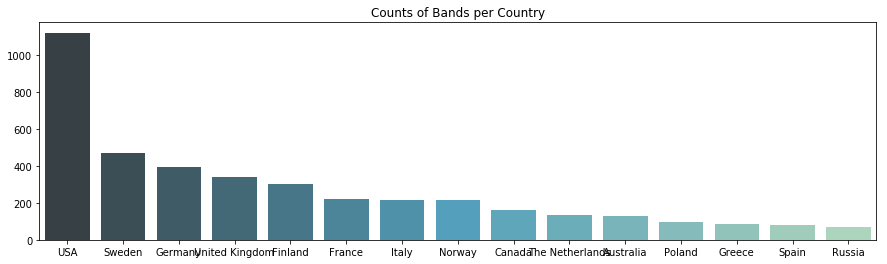

In [21]:
# What countries produces the most metal bands? 

plt.figure(figsize=(15,4))
bands_country = bands['origin'].value_counts()
plt.title('Counts of Bands per Country')
sns.barplot(x=bands_country[:15].keys(), y=bands_country[:15].values, palette="GnBu_d")

It is evident that the majority of metal music were originated in the United States. This can also be questioning because metal music was initially originated in the United Kingdom. Countries like USA, Sweden, and Germany have been forming more bands than the UK in the the given years. 

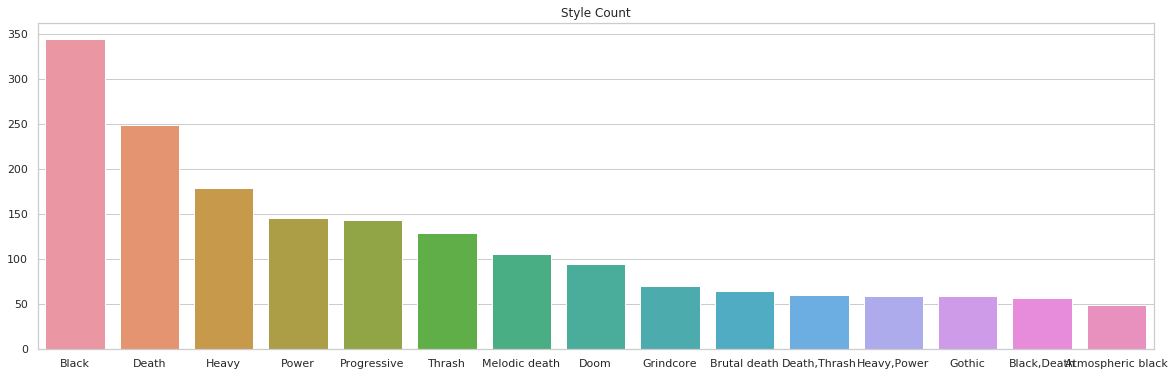

In [22]:
# What are the most popular styles of metal music?

sns.set(style="whitegrid")

plt.figure(figsize=(20,6)) 
style = bands['style'].value_counts()
plt.title('Style Count')
sns.barplot(x=style[:15].keys(), y=style[:15].values)

Looks like the majority of fans prefer Black, Death, and Heavy sub-genres in metal music. This is not entirely surprising because Black has been one of the popular subgenres circulating among Heavy Metal music for over a decade.

Now that we have explored the dataset briefly, let me get into finding a solution to the problem stated above. For this purpose, I will be using the most popular Hypothesis Testing to further investigate our problem.

# C. Hypothesis

I believe that there is an increase in the number of fans by the country of origin.

I will use the data provided to see if there is a substantial change in the increase of fans from which the bands were originated.

In [35]:
# Total number of fans in the dataset
bands['fans'].values.sum()

347824

In [33]:
# Total Number of fans for USA 

USA = bands.loc[bands.origin=='USA', 'fans'].values.sum()
USA

99448

In [34]:
# Total number of fans for Sweden
bands.loc[bands.origin=='Sweden', 'fans'].values.sum()

47192

In [36]:
print("mean of USA")
print(bands.loc[bands.origin=='USA', 'fans'].values.mean())

print("mean of Sweden")
print(bands.loc[bands.origin=='Sweden', 'fans'].values.mean())

mean of USA
88.55565449688335
mean of Sweden
100.62260127931769


# D. Method for Testing 

i)   Defining the Hypothesis:
     A hypothesis is a tentative statement about the relationship of two or more variables on what you expect to        see in a particular study. In this study I expect to see an increase in the fanbase in USA in comparison to        Sweden. Thus, I came up with the following hypotheses:

    - Null Hypothesis(Ho): There has been no increase in the number of fans by the country of origin.
    - Alternative Hypothesis(Ha): There is an increase in the number of fans by the country of origin.

ii)  Level of significance (alpha) = 0.05

iii) Sample: 
    I will pick two countries populations for this experiment; namely, USA and Sweden. Since the populations           reflect the bands from 1960s, I will test to see if there is a change in the fanbase of the two countries           between 2010 through 2016. I believe that this result will provide us an accurate measure of the samples           chosen.

iv)  P-value: 
     p-value is the probability of obtaining a sample more extreme than the ones observed in the dataset, assuming      that the null hypothesis is true. I will use this to compute the test statistics results.

v)   Decision

     If p-value < level of significance : reject the null hypothesis
     If p-value > level of significance : fail to reject the null hypothesis


Let's now mean of both bands:

In [80]:
print("mean of USA")
print(bands.loc[bands.origin=='USA', 'fans'].values.mean())

print("mean of Sweden")
print(bands.loc[bands.origin=='Sweden', 'fans'].values.mean())

mean of USA
89.96610169491525
mean of Sweden
99.88686131386861


In [37]:
print("Standard Deviation of USA")
print(bands.loc[bands.origin=='USA', 'fans'].values.std())

print("Standard Deviation of Sweden")
print(bands.loc[bands.origin=='Sweden', 'fans'].values.std())

Standard Deviation of USA
271.92071233142553
Standard Deviation of Sweden
325.2595820825528


Let's use scipy's T-test function to test the means of the two samples. From the statistical results gatered through this test we can then conclude our prediction.

In [38]:
# T Test

# mean1 = USA
# mean2 = Sweden

from scipy.stats import ttest_ind_from_stats

ttest_ind_from_stats(mean1=88.55565449688335, std1=271.92071233142553, nobs1=347824,
                     mean2=100.62260127931769, std2=325.2595820825528, nobs2=347824)


Ttest_indResult(statistic=-16.786541994876288, pvalue=3.1509651322518113e-63)

The t-Test results are evaluated by taking into account the p-value. In statistical hypothesis testing, p-value weighs the strength of the evidence gathered through our data so that we can determine which claim is true. The p-value is a number between 0 and 1 and any value which falls below the confidence interval should be rejected.

In evaluating the test statistics results of the fanbase for USA and Sweden, it is evident that the probability value is below the significance level(0.05). Given that the p-value is below our level of significance(p ≤ 0.05), we can now reject the null hypothesis. In other words, it is statistically significant that there is an increase in the number of fans for metal music in the US than Sweden. Therefore, it is evident that there is a relationship of the fanbase for metal music depending on its country of origin.

# Conclusion:

Now that we have already gathered our insights through the experiment, it is evident that there is an increase in the number of fans based on its origin. 

This dataset does not reflect the demographics of the fans, geographic locations in each country, and their levels of rating for the bands. I believe that we can strenghten our decision making by taking a closer look at these secondary metrics. Moreover, it is important to conduct further tests every six months or quarterly and analyze if our hypothsis holds true.

# Resources:

- The Dataset: (https://www.kaggle.com/mrpantherson/metal-by-nation)
- Metal Storm (http://metalstorm.net/)
- Death of Heavy Metal (https://observer.com/2016/01/the-slow-death-of-heavy-metal/)